# Credit Risk Modelling

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
t=pd.read_csv('https://raw.githubusercontent.com/akjadon/Finalprojects_DS/master/Credit-Risk-Modelling/data/cs-training.csv')

In [3]:

t = t.drop('Unnamed: 0', axis = 1)
t.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
t.tail()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0
149999,0,0.850283,64,0,0.249908,8158.0,8,0,2,0,0.0


In [5]:
t.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [6]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.6 MB


In [7]:
t[t.columns[1:]].describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [8]:
t[t.columns[1:]].median()

RevolvingUtilizationOfUnsecuredLines       0.154181
age                                       52.000000
NumberOfTime30-59DaysPastDueNotWorse       0.000000
DebtRatio                                  0.366508
MonthlyIncome                           5400.000000
NumberOfOpenCreditLinesAndLoans            8.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               1.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         0.000000
dtype: float64

In [9]:
t[t.columns[1:]].mode()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.0,49,0,0.0,5000.0,6,0,0,0,0.0


In [10]:
t[t.columns[1:]].skew()

RevolvingUtilizationOfUnsecuredLines     97.631574
age                                       0.188995
NumberOfTime30-59DaysPastDueNotWorse     22.597108
DebtRatio                                95.157793
MonthlyIncome                           114.040318
NumberOfOpenCreditLinesAndLoans           1.215314
NumberOfTimes90DaysLate                  23.087345
NumberRealEstateLoansOrLines              3.482484
NumberOfTime60-89DaysPastDueNotWorse     23.331743
NumberOfDependents                        1.588242
dtype: float64

In [11]:
total_len = len(t['SeriousDlqin2yrs'])
percentage_labels = (t['SeriousDlqin2yrs'].value_counts()/total_len)*100
percentage_labels

0    93.316
1     6.684
Name: SeriousDlqin2yrs, dtype: float64

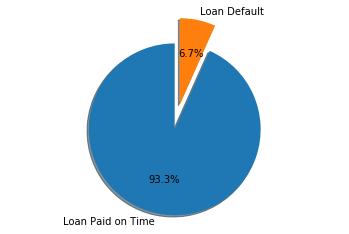

In [12]:
labels = 'Loan Paid on Time', 'Loan Default'
sizes = [93.32,6.68]
explode = (0.3,0)  # only "explode" the 2nd slice (i.e. 'Default')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [13]:
t.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [14]:
trainingwona = t.fillna((t.median()))
t.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [15]:
trainingwona.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [16]:
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    (minval, maxval) = np.percentile(data, [diff, 100 - diff])
    return ((data < minval) | (data > maxval)) #get only outliers, not the entire data


def mad_based_outlier(points, threshold=3.5):
    median_y = np.median(points)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in points])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in points]

    return np.abs(modified_z_scores) > threshold


def std_div(data, threshold=3):
    std = data.std()
    mean = data.mean()
    isOutlier = []
    for val in data:
        if val/std > threshold:
            isOutlier.append(True)
        else:
            isOutlier.append(False)
    return isOutlier

def outlierVote(data):
    x = percentile_based_outlier(data)
    y = mad_based_outlier(data)
    z = std_div(data)
    temp = list(zip(data.index, x, y, z)) #edit made zip has no length
    final = []
    for i in range(len(temp)):
        if temp[i].count(False) >= 2:
            final.append(False)
        else:
            final.append(True)
    return final

In [17]:
outlierVote(t.age)

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 

In [18]:
def plotOutlier(x):
    fig, axes = plt.subplots(nrows=4)
    for ax, func in list(zip(axes, [percentile_based_outlier, mad_based_outlier, std_div, outlierVote])):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=20)
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    axes[2].set_title('STD-based Outliers', **kwargs)
    axes[3].set_title('Majority vote based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=20)
    fig = plt.gcf()
    fig.set_size_inches(15,10)

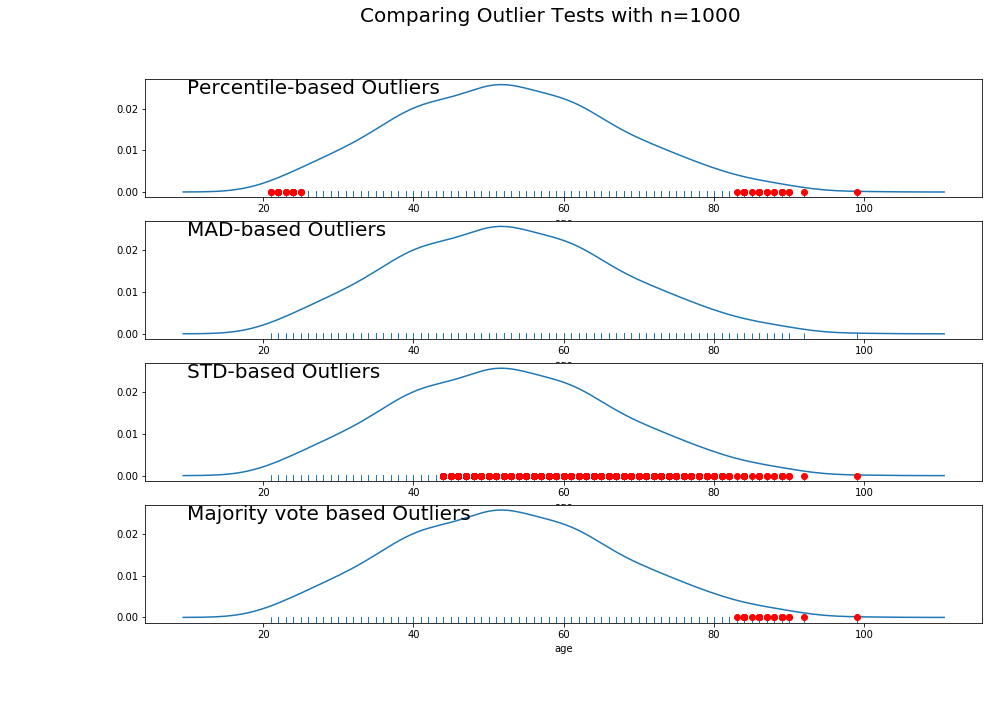

In [19]:
plotOutlier(t.age.sample(1000))

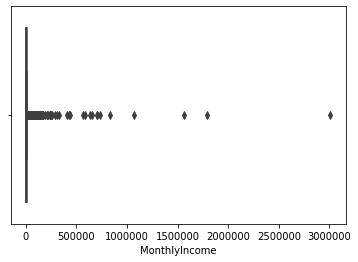

In [20]:
import seaborn as sns
sns.boxplot(x=trainingwona['MonthlyIncome'])

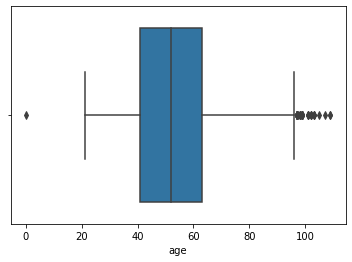

In [21]:
import seaborn as sns
sns.boxplot(x=trainingwona['age'])

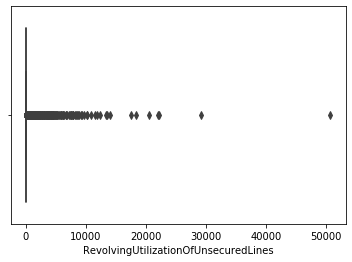

In [22]:
import seaborn as sns
sns.boxplot(x=trainingwona['RevolvingUtilizationOfUnsecuredLines'])

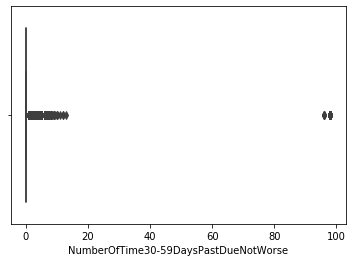

In [23]:
import seaborn as sns
sns.boxplot(x=trainingwona['NumberOfTime30-59DaysPastDueNotWorse'])

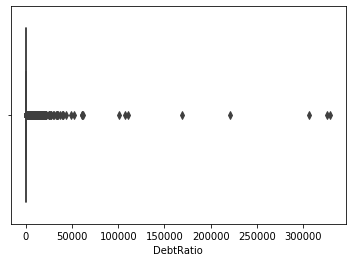

In [24]:
import seaborn as sns
sns.boxplot(x=trainingwona['DebtRatio'])

In [25]:
trainingwona.corr()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.000000,-0.001802,-0.115386,0.125587,-0.007602,-0.017151,-0.029669,0.117175,-0.007038,0.102261,0.046869
RevolvingUtilizationOfUnsecuredLines,-0.001802,1.000000,-0.005898,-0.001314,0.003961,0.006513,-0.011281,-0.001061,0.006235,-0.001048,0.001193
age,-0.115386,-0.005898,1.000000,-0.062995,0.024188,0.027581,0.147705,-0.061005,0.033150,-0.057159,-0.215693
NumberOfTime30-59DaysPastDueNotWorse,0.125587,-0.001314,-0.062995,1.000000,-0.006542,-0.008370,-0.055312,0.983603,-0.030565,0.987005,-0.004590
DebtRatio,-0.007602,0.003961,0.024188,-0.006542,1.000000,-0.018006,0.049565,-0.008320,0.120046,-0.007533,-0.044476
MonthlyIncome,-0.017151,0.006513,0.027581,-0.008370,-0.018006,1.000000,0.086949,-0.010500,0.116273,-0.009252,0.066314
NumberOfOpenCreditLinesAndLoans,-0.029669,-0.011281,0.147705,-0.055312,0.049565,0.086949,1.000000,-0.079984,0.433959,-0.071077,0.074026
NumberOfTimes90DaysLate,0.117175,-0.001061,-0.061005,0.983603,-0.008320,-0.010500,-0.079984,1.000000,-0.045205,0.992796,-0.011962
NumberRealEstateLoansOrLines,-0.007038,0.006235,0.033150,-0.030565,0.120046,0.116273,0.433959,-0.045205,1.000000,-0.039722,0.129399
NumberOfTime60-89DaysPastDueNotWorse,0.102261,-0.001048,-0.057159,0.987005,-0.007533,-0.009252,-0.071077,0.992796,-0.039722,1.000000,-0.012678


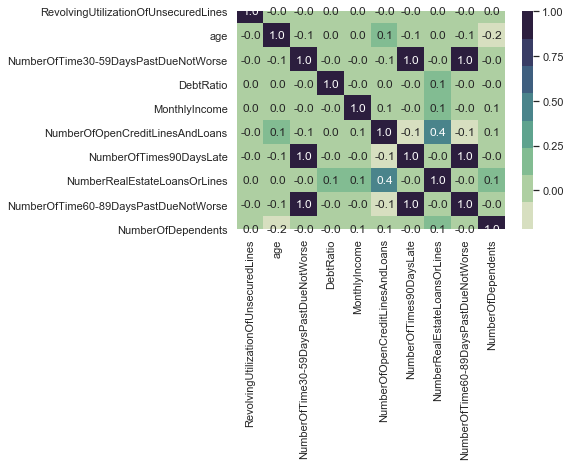

In [26]:
sns.set()
sns.heatmap(trainingwona[trainingwona.columns[1:]].corr(),annot=True,fmt=".1f",
            cmap=(sns.cubehelix_palette(8, start=.5, rot=-.75)))
plt.show()

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(trainingwona)
final = pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)
final

C:\Users\admin\Anaconda2\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                                   17.302477
SeriousDlqin2yrs                         1.058808
RevolvingUtilizationOfUnsecuredLines     1.000360
age                                      1.095060
NumberOfTime30-59DaysPastDueNotWorse    41.566331
DebtRatio                                1.019393
MonthlyIncome                            1.020195
NumberOfOpenCreditLinesAndLoans          1.285324
NumberOfTimes90DaysLate                 73.849189
NumberRealEstateLoansOrLines             1.273689
NumberOfTime60-89DaysPastDueNotWorse    93.849939
NumberOfDependents                       1.081679
dtype: float64

In [28]:
final

const                                   17.302477
SeriousDlqin2yrs                         1.058808
RevolvingUtilizationOfUnsecuredLines     1.000360
age                                      1.095060
NumberOfTime30-59DaysPastDueNotWorse    41.566331
DebtRatio                                1.019393
MonthlyIncome                            1.020195
NumberOfOpenCreditLinesAndLoans          1.285324
NumberOfTimes90DaysLate                 73.849189
NumberRealEstateLoansOrLines             1.273689
NumberOfTime60-89DaysPastDueNotWorse    93.849939
NumberOfDependents                       1.081679
dtype: float64

In [29]:
import scipy
from scipy.stats.mstats import winsorize

In [30]:
cleancolumn = []
for i in range(len(trainingwona.columns)):
    cleancolumn.append(trainingwona.columns[i].replace('-', '').lower())
trainingwona.columns = cleancolumn 

In [31]:
trainingwona.columns

Index(['seriousdlqin2yrs', 'revolvingutilizationofunsecuredlines', 'age',
       'numberoftime3059dayspastduenotworse', 'debtratio', 'monthlyincome',
       'numberofopencreditlinesandloans', 'numberoftimes90dayslate',
       'numberrealestateloansorlines', 'numberoftime6089dayspastduenotworse',
       'numberofdependents'],
      dtype='object')

In [32]:
trainingwona.MonthlyIncome = scipy.stats.mstats.winsorize(trainingwona.monthlyincome,0.05)

C:\Users\admin\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [33]:
trainingwona.age = scipy.stats.mstats.winsorize(trainingwona.age,0.05)

In [34]:
trainingwona.age = scipy.stats.mstats.winsorize(trainingwona.age,0.05)

In [35]:
trainingwona.revolvingutilizationofunsecuredlines = scipy.stats.mstats.winsorize(trainingwona.revolvingutilizationofunsecuredlines,0.05)
trainingwona.numberoftime3059dayspastduenotworse = scipy.stats.mstats.winsorize(trainingwona.numberoftime3059dayspastduenotworse,0.05)
trainingwona.debtratio = scipy.stats.mstats.winsorize(trainingwona.debtratio,0.05)
trainingwona.numberofopencreditlinesandloans = scipy.stats.mstats.winsorize(trainingwona.numberofopencreditlinesandloans,0.05)
trainingwona.numberoftimes90dayslate = scipy.stats.mstats.winsorize(trainingwona.numberoftimes90dayslate,0.05)
trainingwona.numberrealestateloansorlines = scipy.stats.mstats.winsorize(trainingwona.numberrealestateloansorlines,0.05)
trainingwona.numberoftime6089dayspastduenotworse = scipy.stats.mstats.winsorize(trainingwona.numberoftime6089dayspastduenotworse,0.05)
trainingwona.numberofdependents  = scipy.stats.mstats.winsorize(trainingwona.numberofdependents,0.05)

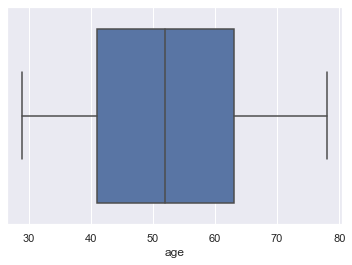

In [36]:
import seaborn as sns
sns.boxplot(x=trainingwona['age'])

In [37]:
trainingwona.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,3,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [38]:
training1 = trainingwona.drop('numberoftime3059dayspastduenotworse', axis = 1)

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(training1)
final = pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)
final

C:\Users\admin\Anaconda2\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                                   23.697790
seriousdlqin2yrs                         1.214860
revolvingutilizationofunsecuredlines     1.237761
age                                      1.161904
debtratio                                1.056793
monthlyincome                            1.020960
numberofopencreditlinesandloans          1.312785
numberoftimes90dayslate                  1.254629
numberrealestateloansorlines             1.339261
numberoftime6089dayspastduenotworse      1.164398
numberofdependents                       1.118288
dtype: float64

In [40]:
training2 =  trainingwona.drop('numberoftime6089dayspastduenotworse', axis = 1)

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(training2)
final = pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)
final

const                                   23.692779
seriousdlqin2yrs                         1.215622
revolvingutilizationofunsecuredlines     1.261570
age                                      1.162105
numberoftime3059dayspastduenotworse      1.178686
debtratio                                1.056779
monthlyincome                            1.020964
numberofopencreditlinesandloans          1.329368
numberoftimes90dayslate                  1.231371
numberrealestateloansorlines             1.339009
numberofdependents                       1.118916
dtype: float64

In [42]:
training3 =  trainingwona.drop('numberoftimes90dayslate', axis = 1)

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(training3)
final = pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)
final

const                                   23.673542
seriousdlqin2yrs                         1.179998
revolvingutilizationofunsecuredlines     1.242644
age                                      1.162206
numberoftime3059dayspastduenotworse      1.205472
debtratio                                1.056792
monthlyincome                            1.020960
numberofopencreditlinesandloans          1.322511
numberrealestateloansorlines             1.337116
numberoftime6089dayspastduenotworse      1.168785
numberofdependents                       1.118921
dtype: float64

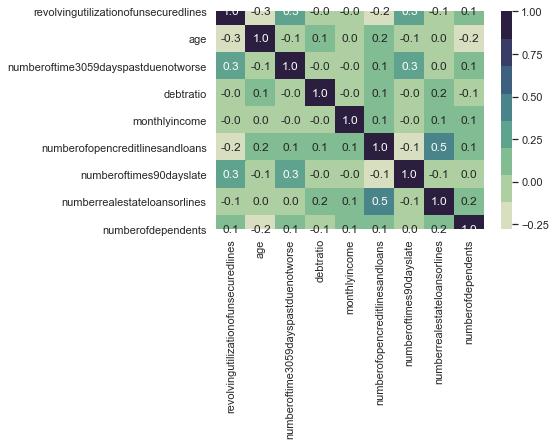

In [44]:
sns.set()
sns.heatmap(training2[training2.columns[1:]].corr(),annot=True,fmt=".1f",
            cmap=(sns.cubehelix_palette(8, start=.5, rot=-.75)))
plt.show()

In [45]:
from sklearn.ensemble import RandomForestClassifier


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


X = training2.drop('seriousdlqin2yrs', axis=1)
y = training2.seriousdlqin2yrs

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((112500, 9), (112500,), (37500, 9), (37500,))

In [47]:
logmodel = LogisticRegression(solver='liblinear')
logmodel

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
logmodel.fit(X_train,y_train)
logmodel.coef_

array([[ 1.98292278e+00, -2.58962680e-02,  7.44021957e-01,
        -8.46638982e-05, -2.80091750e-05,  4.09130429e-02,
         1.69463051e+00,  8.63435071e-02,  1.49392135e-02]])

In [49]:
import statsmodels.api as sm
logmodelresult = sm.Logit(y_train, sm.add_constant(X_train)).fit()

Optimization terminated successfully.
         Current function value: 0.185515
         Iterations 8


C:\Users\admin\Anaconda2\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [50]:
print(logmodelresult.summary())

                           Logit Regression Results                           
Dep. Variable:       seriousdlqin2yrs   No. Observations:               112500
Model:                          Logit   Df Residuals:                   112490
Method:                           MLE   Df Model:                            9
Date:                Wed, 30 Oct 2019   Pseudo R-squ.:                  0.2440
Time:                        15:14:02   Log-Likelihood:                -20870.
converged:                       True   LL-Null:                       -27607.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -3.5515      0.068    -51.908      0.000      -3.686      -3.417
revolvingutilizationofunsecuredlines     2.0141      

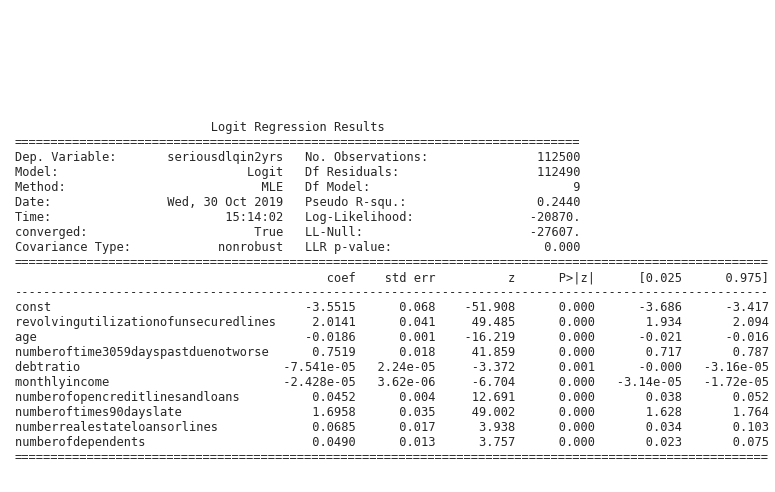

In [51]:
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(logmodelresult.summary()), {'fontsize': 10}, fontproperties = 'monospace') 
plt.axis('off')
plt.tight_layout()
plt.savefig('output.png')

In [52]:
logmodelpredict =logmodel.predict(X_test)

In [53]:
report =pd.DataFrame([logmodelpredict, y_test]).T
report.columns = ["Prediction", "Actual"]
report

,Prediction,Actual
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
37495,0,0
37496,0,0
37497,0,0
37498,0,0


In [54]:
report_match = (report.Prediction == report.Actual)
misclassification_rate = 100 - report_match.sum()/report.shape[0]*100
misclassification_rate

6.573333333333338

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, logmodelpredict)
cm

array([[34640,   354],
       [ 2111,   395]], dtype=int64)

In [56]:
def conf_mat_summary(cm):
    TP = cm[0][0] 
    TN = cm[1][1]
    FP = cm[1][0]
    FN = cm[0][1]
    print ('Accuracy =',((TP+TN)*100)/(TP+TN+FP+FN))
    print ('Sensitivity =', ((TP)*100)/(TP+FN))
    print ('Specificity =', ((FP)*100)/(FP+TN))

In [57]:
conf_mat_summary(cm)

Accuracy = 93.42666666666666
Sensitivity = 98.98839801108761
Specificity = 84.23782920989625


In [58]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [59]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [60]:
test_prob = logmodel.predict_proba(X_test)
test_prob1 = test_prob[:, 1]
test_prob1.shape

(37500,)

In [61]:
fpr, tpr, thresholds = roc_curve(y_test, test_prob1)

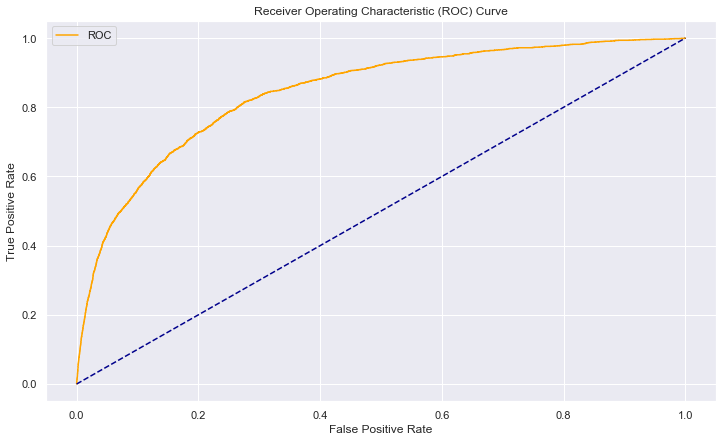

In [62]:
plot_roc_curve(fpr,tpr)

In [63]:


auc = roc_auc_score(y_test, test_prob1)
print('AUC: %.2f' % auc)



AUC: 0.84


In [64]:
o = pd.read_csv('https://raw.githubusercontent.com/akjadon/Finalprojects_DS/master/Credit-Risk-Modelling/data/cs-test.csv')

In [65]:
cleancolumn = []
for i in range(len(o.columns)):
    cleancolumn.append(o.columns[i].replace('-', '').lower())
o.columns = cleancolumn

In [66]:
X_out = o.drop('seriousdlqin2yrs', axis=1)
y_out = o.seriousdlqin2yrs
X_out = o.fillna(0)
X_out = X_out.drop('numberoftime6089dayspastduenotworse', axis = 1)
X_out = X_out.drop('unnamed: 0', axis = 1)
X_out = X_out.drop('seriousdlqin2yrs', axis = 1)

In [67]:
X_out

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberofdependents
0,0.885519,43,0,0.177513,5700.0,4,0,0,0.0
1,0.463295,57,0,0.527237,9141.0,15,0,4,2.0
2,0.043275,59,0,0.687648,5083.0,12,0,1,2.0
3,0.280308,38,1,0.925961,3200.0,7,0,2,0.0
4,1.000000,27,0,0.019917,3865.0,4,0,0,1.0
...,...,...,...,...,...,...,...,...,...
101498,0.282653,24,0,0.068522,1400.0,5,0,0,0.0
101499,0.922156,36,3,0.934217,7615.0,8,0,2,4.0
101500,0.081596,70,0,836.000000,0.0,3,0,0,0.0
101501,0.335457,56,0,3568.000000,0.0,8,0,2,3.0


In [68]:
y_out = logmodel.predict_proba(np.array(X_out.values))[:,1]

In [69]:
print(y_out)

[0.07970812 0.05130897 0.01679065 ... 0.0090881  0.02570674 0.06646536]


In [70]:
def result(data):
    result =[]
    for val in data:
        if val > 0.5:
            result.append('Default')
        else:
            result.append('Good')
    return result

In [71]:
final_verdict = result(y_out)

In [72]:
Data = pd.DataFrame({ 'Probability': y_out, 'Verdict': final_verdict })
output = pd.DataFrame(Data)

In [73]:
output

,Probability,Verdict
0,0.079708,Good
1,0.051309,Good
2,0.016791,Good
3,0.082601,Good
4,0.149488,Good
...,...,...
101498,0.047954,Good
101499,0.594370,Default
101500,0.009088,Good
101501,0.025707,Good


In [74]:
output.to_csv("Predictions.csv", index=True)